### Generalized Additive Model (GAM) using `mgcv` package

A non-spatial non-linear toy example to get familar the package and the technique. Part of the materials are referenced from [here](https://noamross.github.io/gams-in-r-course/).

If you don't have rpy2 package, install it with `pip`. Additionally, in order to use R in notebook, you need to have it installed. Alternatively, you could run this notebook on Google Colab, or using your local R studio.

In [1]:
#pip install rpy2

In [2]:
#pip install rpy2
%load_ext rpy2.ipython

Add the `%%R` magic command interface to each cell block. 
(You have to have R installed beforehand)

In [3]:
%%R 
#install.packages("mgcv")
library(mgcv) #GAM package

#Read in the data
mpg = read.csv("https://raw.github.com/Ziqi-Li/geog570/main/data/mpg.csv")

Loading required package: nlme
This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.


In [4]:
%%R 
#Check out the first 5 rows of mpg
head(mpg)

  X symbol loss        make fuel aspir doors       style drive eng.loc   wb
1 1      3   NA alfa-romero  gas   std   two convertible   rwd   front 88.6
2 2      3   NA alfa-romero  gas   std   two convertible   rwd   front 88.6
3 3      1   NA alfa-romero  gas   std   two   hatchback   rwd   front 94.5
4 4      2  164        audi  gas   std  four       sedan   fwd   front 99.8
5 5      2  164        audi  gas   std  four       sedan   4wd   front 99.4
6 6      2   NA        audi  gas   std   two       sedan   fwd   front 99.8
  length width height weight eng.type cylinders eng.cc fuel.sys bore stroke
1  168.8  64.1   48.8   2548     dohc      four    130     mpfi 3.47   2.68
2  168.8  64.1   48.8   2548     dohc      four    130     mpfi 3.47   2.68
3  171.2  65.5   52.4   2823     ohcv       six    152     mpfi 2.68   3.47
4  176.6  66.2   54.3   2337      ohc      four    109     mpfi 3.19   3.40
5  176.6  66.4   54.3   2824      ohc      five    136     mpfi 3.19   3.40
6  177.3  66

### OLS baseline
Here we fit a linear regression model using `lm()` function.

The dependent variable is city.mpg, and the independent variables are: weight, length, hp, and price of a car.

In R, we can simply use `y ~ x1 + x2 + x3`. Use the `summary()` function to print out the statistics of the model.

In [5]:
%%R
ols <- lm(city.mpg ~ weight + length + price + hp + width, data = mpg)
summary(ols)


Call:
lm(formula = city.mpg ~ weight + length + price + hp + width, 
    data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5637 -1.7462 -0.3131  1.3805 13.6328 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.943e+01  1.350e+01   4.402 1.77e-05 ***
weight      -1.566e-03  1.427e-03  -1.097  0.27405    
length      -1.469e-01  4.621e-02  -3.180  0.00172 ** 
price        1.421e-04  6.407e-05   2.218  0.02773 *  
hp          -1.246e-01  1.161e-02 -10.738  < 2e-16 ***
width        9.655e-02  2.528e-01   0.382  0.70292    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.348 on 193 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.7375,	Adjusted R-squared:  0.7307 
F-statistic: 108.5 on 5 and 193 DF,  p-value: < 2.2e-16



The `%%R` command allows adidtional parameter:

- `-w` 600: set up a plot window width
- `-h` 500: set up a plot window height
- `-p` 15: set up the font size

Plot a simple residuals plot

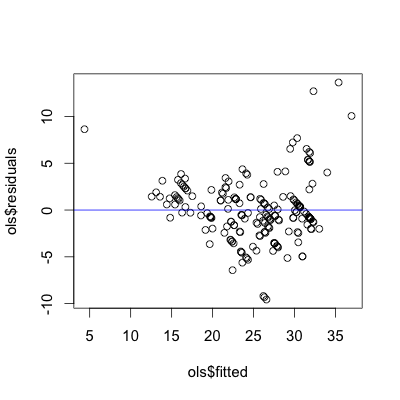

In [6]:
%%R -w 400 -h 400 -p 15
plot(ols$fitted,ols$residuals) #use `$` to access properties of the linear fit.
abline(h=0, col="blue") #add a horizontal line.

### Fit a simple GAM

In GAM we will be using `gam` function `gam(y ~ s(x1) + s(x2) + s(x3))`. 

Here you may notice that we put a `s` for each predictor, this means that we want fit a non-linear smooth for that predictor. You can also do `gam(y ~ s(x1) + s(x2) + x3)`. In this case, we are looking at two non-linear smoothers for x1 and x2, and one linear relationship for x3.

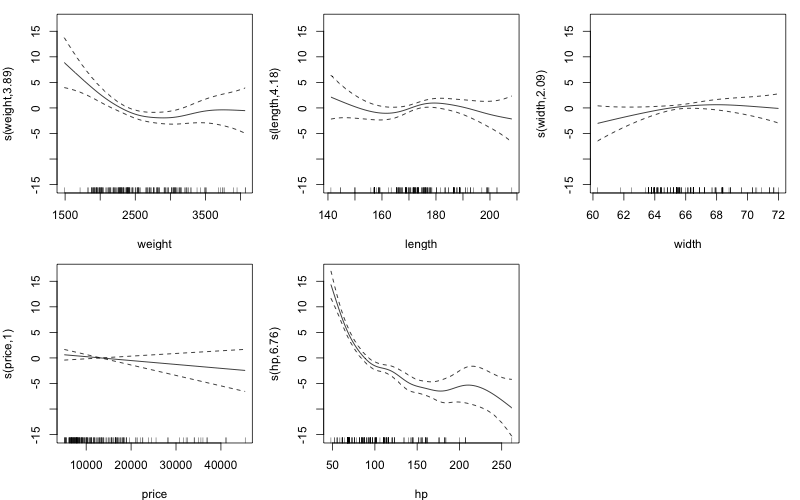

In [7]:
%%R -w 800 -h 500 -p 18

par(mar = c(4, 4, 1, 1))
gam1 <- gam(city.mpg ~ s(weight) + s(length) + s(width) + s(price) + s(hp), data = mpg)

# Plot the model
plot(gam1, pages = 1)

These plots are partial dependence plots, showing you the marginal relationship between each predictor and the dependent variable. For example, the relationship between horsepower and mpg seems to be quite non-linear, but the other two factors are relatively linear to the mpg.

### GAM summary and interpretation

Summary of the gam model:

In [8]:
%%R
summary(gam1)


Family: gaussian 
Link function: identity 

Formula:
city.mpg ~ s(weight) + s(length) + s(width) + s(price) + s(hp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.2010     0.1718   146.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df      F  p-value    
s(weight) 3.892  4.856  4.548 0.000797 ***
s(length) 4.184  5.178  2.171 0.058083 .  
s(width)  2.088  2.640  1.353 0.207440    
s(price)  1.000  1.000  1.409 0.236783    
s(hp)     6.759  7.806 27.321  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.859   Deviance explained = 87.2%
GCV = 6.4893  Scale est. = 5.8723    n = 199


In the `Parametric coefficients:` section, it lists the coefficients for linear predictors (if any). Here we have a global intercept which equals to 25.18 and it is significant.

In the `Approximate significance of smooth terms:` section, it lists the estimated degree of freedom (edf) and F-statistics for each smoother. 

- For `edf`: If it is close to 1, it is indicating the relationship is linear. An edf of 2 is equivalent to a quadratic curve, and so on, with higher edfs describing more wiggly curves. In this case, price vs. mpg is almost linear, but rpm vs. mpg is the most non-linear one.

- For `Ref.df`, `F` and `p-value`: The Ref.df and F columns are test statistics used in an ANOVA test to test overall significance of the smooth. The result of this test is the `p-value` to the right. If the `p-value` is smaller than 0.05, it says the factor is a significant one in our model. In this case, `length`, `width` and `price` of a car are insignificant predictors to the mpg.

The model has an overall R2 of `R-sq.(adj) =  0.859`

You can get the AIC of the model by `AIC()`

In [9]:
%%R
AIC(gam1)

[1] 936.9776


### Visualizing GAMs

Docomentation for the plot() function in mgcv:

https://www.rdocumentation.org/packages/mgcv/versions/1.8-33/topics/plot.gam

Some most commonly used potting options:

- `shade=TRUE`: changes the confidence interval display to be shaded
- `shade.col = "lightblue"`: change the color of the shade
- `residuals=TRUE`: show the partial residuals on the plots. Partial residuals are the difference between the partial effect and the data, after all other partial effects have been accounted for.
- `rug = TRUE`: show the distribution of the predictor at the bottom (little vertical lines)
- `cex`: change the size of the dots
- `scale`: set to -1 (default) to have the same y-axis scale for each plot, and to 0 for a different y axis for each plot. Ignored if ylim supplied

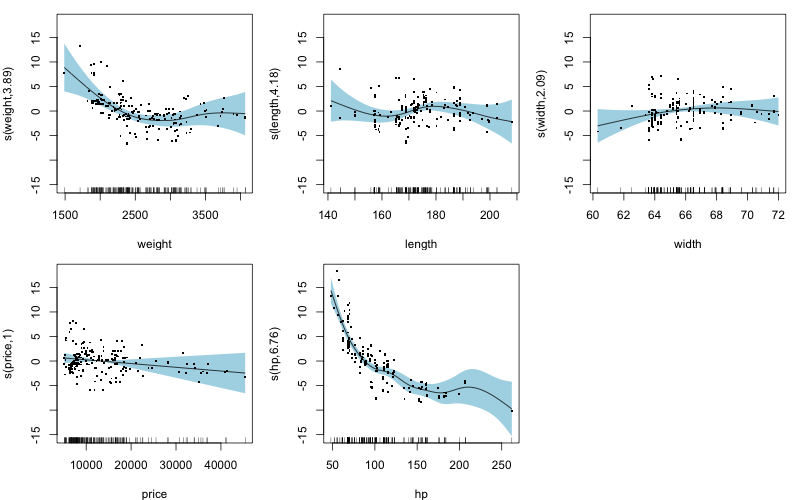

In [10]:
%%R -w 800 -h 500 -p 18
par(mar = c(4, 4, 1, 1)) #to set up the margin to avoid some empty space between plots
plot(gam1, pages = 1, shade=TRUE, shade.col = "lightblue", residuals=TRUE, rug=TRUE, cex = 4)

#Making shade=True, changes the confidence interval display.

### Model checking


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 13 iterations.
The RMS GCV score gradient at convergence was 5.075705e-07 .
The Hessian was positive definite.
Model rank =  46 / 46 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

            k'  edf k-index p-value    
s(weight) 9.00 3.89    0.89   0.045 *  
s(length) 9.00 4.18    1.03   0.645    
s(width)  9.00 2.09    1.00   0.500    
s(price)  9.00 1.00    0.99   0.400    
s(hp)     9.00 6.76    0.79  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


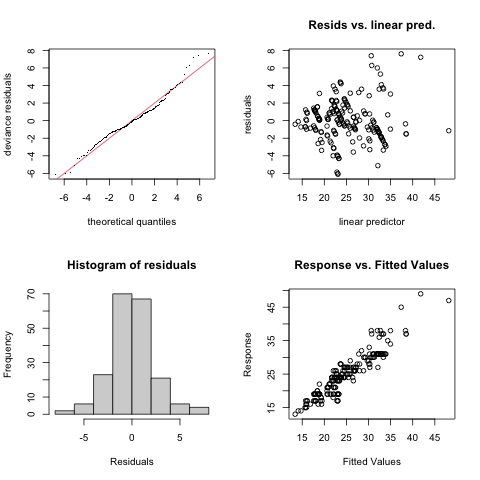

In [11]:
%%R
gam.check(gam1)

If you do find the problem as mentioned: `Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.`

You would need to speficy a higher k-value in the gam function like this: `gam(y ~ s(x1, k=15))`. `k` is the dimension of the basis used to represent the smooth term. The higher `k` is, the more wiggleness you are allowing for the smooth.

In our example, we want to re-run a model with a larger `k` for `hp` . The p-value for each smooth indicates that whether whether the basis dimension for a smooth is adequated. If significnat, then possibly not adequate, you need to specify a larger `k`. However, the test is based on approximations. You don't have to worry about it if you have already specified a large enough `k`.

So lets repeat our model:

In [12]:
%%R
gam2 <- gam(city.mpg ~ s(weight) + s(length) + s(width) + s(price) + s(hp,k=15), data = mpg)

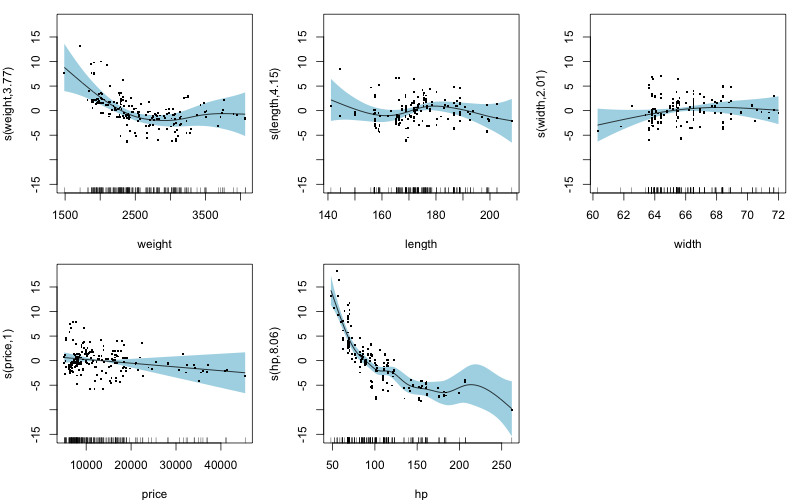

In [13]:
%%R -w 800 -h 500 -p 18
par(mar = c(4, 4, 1, 1))
plot(gam2, pages = 1, shade=TRUE, shade.col = "lightblue", residuals=TRUE, rug=TRUE, cex = 4)

In [14]:
%%R 
summary(gam2)


Family: gaussian 
Link function: identity 

Formula:
city.mpg ~ s(weight) + s(length) + s(width) + s(price) + s(hp, 
    k = 15)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.2010     0.1709   147.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df      F  p-value    
s(weight) 3.766  4.703  4.690 0.000751 ***
s(length) 4.155  5.144  2.110 0.065286 .  
s(width)  2.008  2.529  1.396 0.200830    
s(price)  1.000  1.000  1.405 0.237539    
s(hp)     8.061  9.566 22.503  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.86   Deviance explained = 87.4%
GCV = 6.4596  Scale est. = 5.8108    n = 199



Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 12 iterations.
The RMS GCV score gradient at convergence was 3.245868e-07 .
The Hessian was positive definite.
Model rank =  51 / 51 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

             k'   edf k-index p-value    
s(weight)  9.00  3.77    0.90    0.09 .  
s(length)  9.00  4.15    1.03    0.67    
s(width)   9.00  2.01    1.01    0.52    
s(price)   9.00  1.00    0.99    0.41    
s(hp)     14.00  8.06    0.81  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


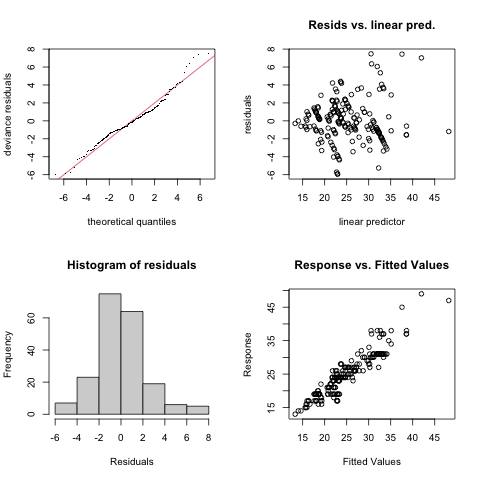

In [15]:
%%R
gam.check(gam2)

We are not seeing a large difference in this example between `gam1` and `gam2`.

### Checking concurvity (similar to colinearity in linear model)

You may recall the concept of collinearity from a linear modeling course. When two variables or covariates in a model are strongly correlated, it's difficult to fit the model, because the outcome variable could be responding to either one. We call this phenomenon collinearity, and it can result in poorly fit models with large confidence intervals. In general, we avoid putting multiple collinear variables into the same model.


Concurvity: With GAMs, we have an additional potential pitfall. Even if two variables aren't collinear, they may have concurvity, that is, one may be a smooth curve of another. For example, if X1 = X2^2 (X2 squared), then they have perfect concurvity. We cannot add both X1 and X2 in our model.


In [16]:
%%R
#install.packages("corrplot")
library(corrplot)

corrplot 0.92 loaded


Correlation matrix in R

In [17]:
%%R
M<-cor(mpg[c("weight","length","price","hp","width")],use="pairwise.complete.obs")
head(round(M,2))

       weight length price   hp width
weight   1.00   0.88  0.83 0.75  0.87
length   0.88   1.00  0.69 0.56  0.84
price    0.83   0.69  1.00 0.81  0.75
hp       0.75   0.56  0.81 1.00  0.64
width    0.87   0.84  0.75 0.64  1.00


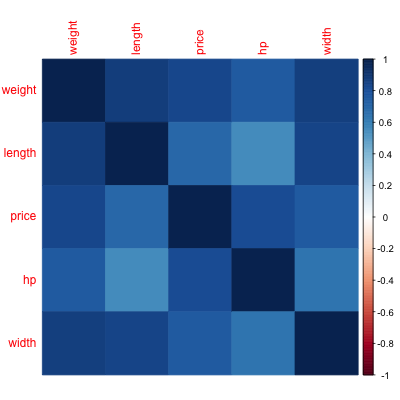

In [18]:
%%R -w 400 -h 400 
corrplot(M, method="color")

Check concurvity in gam. Here we may want to put more focus on the worst case.

When we have `full = TRUE`, it reports overall concurvity for each smooth. Specifically, it shows how much each smooth is predetermined by all the other smooths.

When we have `full = FALSE`, it reports all pair-wise concurvity for all three situations.

The values in the table ranges between 0-1 with 0 indicates no problem at, and 1 indicates perfect concurvity.

Since concurvity is complex, the function reports three different ways of measuring concurvity. Each is better in some situations. What is important is that you should always look at the worst case, and if the value is high (say, over 0.8), inspect your model more carefully.

In [19]:
%%R
concurvity(gam2, full = TRUE)

                 para s(weight) s(length)  s(width)  s(price)     s(hp)
worst    4.602421e-17 0.9706761 0.9342892 0.9402946 0.9453023 0.8802498
observed 4.602421e-17 0.9404062 0.8077322 0.7873199 0.9282552 0.7444640
estimate 4.602421e-17 0.9345683 0.8609799 0.8209717 0.8882879 0.7550877


In [20]:
%%R
concurvity(gam2, full = FALSE)

$worst
                  para    s(weight)    s(length)     s(width)     s(price)
para      1.000000e+00 1.650775e-25 7.148096e-26 2.469904e-23 1.107207e-25
s(weight) 1.634536e-25 1.000000e+00 8.852156e-01 8.971926e-01 8.687383e-01
s(length) 7.276517e-26 8.852156e-01 1.000000e+00 8.430393e-01 7.055602e-01
s(width)  2.472171e-23 8.971926e-01 8.430393e-01 1.000000e+00 7.028542e-01
s(price)  1.084245e-25 8.687383e-01 7.055602e-01 7.028542e-01 1.000000e+00
s(hp)     2.060520e-17 7.600815e-01 6.208501e-01 6.598534e-01 7.912470e-01
                 s(hp)
para      2.060520e-17
s(weight) 7.600815e-01
s(length) 6.208501e-01
s(width)  6.598534e-01
s(price)  7.912470e-01
s(hp)     1.000000e+00

$observed
                  para    s(weight)    s(length)     s(width)     s(price)
para      1.000000e+00 2.575724e-30 1.902650e-29 5.721163e-30 1.363640e-34
s(weight) 1.634536e-25 1.000000e+00 5.857624e-01 6.989979e-01 7.633561e-01
s(length) 7.276517e-26 7.978958e-01 1.000000e+00 7.041061e-01 5.446737e

This is a convenient trick, you can update the model by simply dropping some predictors out.

In [21]:
%%R
gam3 = update(gam2, . ~ . - s(length) - s(width) - s(price))

Check the concurvity again.

In [22]:
%%R
concurvity(gam3)

                para s(weight)     s(hp)
worst    1.18498e-17 0.7668239 0.7668239
observed 1.18498e-17 0.6905643 0.6364892
estimate 1.18498e-17 0.6329330 0.4591326


Now we only have two predictors, and they are not that correlated. 

In [23]:
%%R
summary(gam3)


Family: gaussian 
Link function: identity 

Formula:
city.mpg ~ s(weight) + s(hp, k = 15)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.2414     0.1786   141.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df      F  p-value    
s(weight)  3.913  4.865  8.215 1.27e-06 ***
s(hp)     10.389 11.928 20.134  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.85   Deviance explained = 86.1%
GCV = 7.0045  Scale est. = 6.4765    n = 203


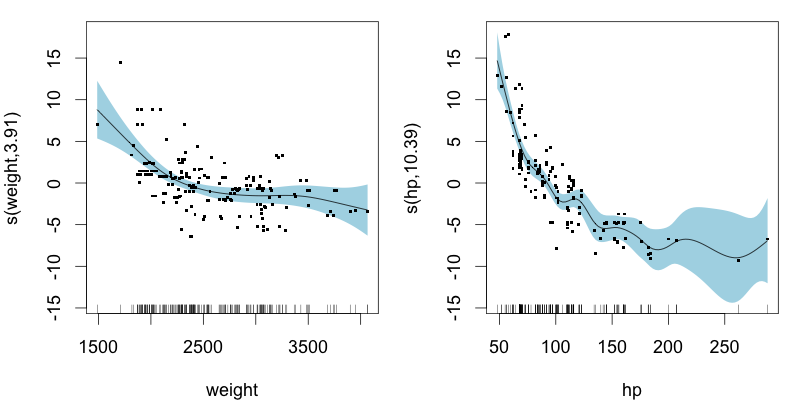

In [24]:
%%R -w 800 -h 400 -p 18
par(mar = c(4, 4, 1, 1))
plot(gam3, pages = 1, shade=TRUE, shade.col = "lightblue", residuals=TRUE, rug=TRUE, cex = 4)

Some final notes and caveats on interpreting the curves. 

1. GAM is a data-driven method. If there are not enough data, GAM won't work well. 
2. The results are not reliable at the boundaries where you have sparse data. You should only explain the trend where you have dense data points. In the weight plot, there are not many observations with weight <1800 and >3500. In this way, the confidence band is large, we are not that confident about the trend there, so we don't want to make any statement about that part of the curve. For another example in the hp plot, we don't have many records with hp>180, so the last bit of wiggled curve is not trustworthy.